<h1>A two-day workshop at the DJI, Munich 2019:<br> Meta-Analysis in Social Research<span class="tocSkip"></span></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Getting-to-know-Jupyter-notebooks" data-toc-modified-id="Getting-to-know-Jupyter-notebooks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting to know Jupyter notebooks</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Using-R" data-toc-modified-id="Using-R-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using R</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#The-&quot;BCG-vaccine-dataset&quot;" data-toc-modified-id="The-&quot;BCG-vaccine-dataset&quot;-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The "BCG vaccine dataset"</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li></ul></div>

## Preliminaries

Please do not touch anything in this section, otherwise this notebook might not work properly. You have been warned! Also, if you have no clue what you are staring at, please consult our [Preface chapter](1-1_preface.ipynb).

In [1]:
source("run_me_first.R")

Loading required package: Matrix
Loading 'metafor' package (version 2.1-0). For an overview 
and introduction to the package please type: help(metafor).


## Getting to know Jupyter notebooks

### Exercise

Create new R "Code" and then a new "Markdown" cell under this (Markdown) cell. In the code cell, execute the expression `13*17*19`.

In [2]:
## Solution.
13*17*20

[1] 4420

Create more Markdown and R cells and execute them. Those of you who know LaTeX can use the `$...$` notation to display math content, e.g. $\frac{17}{83}$.

### Exercise

Delete the following cell (which contains the R code comment "## Ave Caesar, morituri te salutant"):

In [50]:
## Ave Caesar, morituri te salutant.

## Using R

### Exercise

(Re)Load the R package `metafor` (again, the message starting with "Loading required package: Matrix" means everything is okay and it worked).

In [51]:
## Solution.
library(metafor)

### The "BCG vaccine dataset"

Throughout many exercises, we will be using the "BCG vaccine dataset", which can be found in the package `metafor`. All details about his dataset can be found at [http://www.metafor-project.org/doku.php/analyses:berkey1995](http://www.metafor-project.org/doku.php/analyses:berkey1995). In brief, this dataset contains results from 13 studies examining the effectiveness of the Bacillus Calmette-Guerin (BCG) vaccine against tuberculosis.

More details can be found by executing the help command `?dat.bcg` in R (at the bottom of this window should open a new window that contains the dataset description):

In [52]:
## Remove the ## in the next line to execute the help command. 
## ?dat.bcg 

An excerpt of `?dat.cgb` can also found below. The data frame contains the following columns:

The 13 studies provide data in terms of 2x2 tables in the form:

|                 .| TB positive | TB negative |
|------------------|-------------|-------------|
| vaccinated group | tpos        | tneg        |
| control group	   | cpos	     | cneg        |

Actually, we like this version of the table better (it also corresponds to our slides on RRs):

|                 .| vaccinated group | control group|
|------------------|------------------|-------------|
| TB positive      | tpos             | cpos        |
| TB negative  	   | tneg	          | cneg        |

The goal of the meta-analysis was to examine the overall effectiveness of the BCG vaccine for preventing tuberculosis and to examine moderators that may potentially influence the size of the effect.

The following function `escalc` will be introduced in more detail later. For now, you just need to know that it is used to calculate the effect size (relative risk/risk ratio) and corresponding variance (actually, it calculates the log relative risk). For correctly assigning the four table cells to the function arguments `ai`, `bi`, `ci`, `di` see https://cran.r-project.org/web/packages/metafor/metafor.pdf (e.g., "ai vector to specify the 2×2 table frequencies (upper left cell).", p. 94).

In [53]:
dat.bcg <- escalc(measure = "RR", ai = tpos, bi = tneg, ci = cpos, di = cneg, data = dat.bcg)

### Exercise

Inspect the BCG data by typing in the name `dat.bcg`. Make sure that you first load the `metafor` package.

Please note, here, and in the following notebooks, the `metafor` package is loaded multiple times in a notebook (using the command `library(metafor)`). It is usually sufficient to load the `metafor` package only once per notebook. However, sometimes we load a notebook and jump right to a certain exercise without executing all cells. In that case it is helpful when each exercise is "self-sufficient", i.e. without running all cells above. 

In [54]:
## Solution.
library(metafor)
head(dat.bcg)

trial,author,year,tpos,tneg,cpos,cneg,ablat,alloc,yi,vi
1,Aronson,1948,4,119,11,128,44,random,-0.8893113,0.325584765
2,Ferguson & Simes,1949,6,300,29,274,55,random,-1.5853887,0.194581121
3,Rosenthal et al,1960,3,228,11,209,42,random,-1.3480731,0.415367965
4,Hart & Sutherland,1977,62,13536,248,12619,52,random,-1.4415512,0.020010032
5,Frimodt-Moller et al,1973,33,5036,47,5761,13,alternate,-0.2175473,0.051210172
6,Stein & Aronson,1953,180,1361,372,1079,44,alternate,-0.7861156,0.006905618


In most cases, it is better to only show the first few rows of a dataset. This can be accomplished using the `head()` function (it also looks nicer in the Jupyter notebook):

In [55]:
head(dat.bcg)

trial,author,year,tpos,tneg,cpos,cneg,ablat,alloc,yi,vi
1,Aronson,1948,4,119,11,128,44,random,-0.8893113,0.325584765
2,Ferguson & Simes,1949,6,300,29,274,55,random,-1.5853887,0.194581121
3,Rosenthal et al,1960,3,228,11,209,42,random,-1.3480731,0.415367965
4,Hart & Sutherland,1977,62,13536,248,12619,52,random,-1.4415512,0.020010032
5,Frimodt-Moller et al,1973,33,5036,47,5761,13,alternate,-0.2175473,0.051210172
6,Stein & Aronson,1953,180,1361,372,1079,44,alternate,-0.7861156,0.006905618


### Exercise

Next, estimate the simple mean and the simple variance for the effect size distribution (the `yi`’s). The
function for the mean is `mean()` and for the variance `var()`. 

Tip: You probably need to know how to access the variable `yi` in the `dat.bcg` object. Have a look at the sections on "It’s all about objects" and "Accessing elements of a data frame". 

Tip 2: In [ROT13](https://rot13.de/index.php) encoded, you will need `qng.opt$lv` ;-)

In [56]:
## Solution.
mean(dat.bcg$yi)
var(dat.bcg$yi)

[1] -0.7406504

[1] 0.4813654

Let's learn more about assignments `<-`. Use `<-` to save the result of `mean()` to a new R object `m`. Use `v` for `var()`. 

In [57]:
## Solution.
m <- mean(dat.bcg$yi)
v <- var(dat.bcg$yi)

Take the square root of `v` and `var(dat.bcg$yi)` and create the new objects `se` and `se_2`. Can you see the difference?

In [58]:
## Solution.
se <- sqrt(v)
se_2 <- sqrt(var(dat.bcg$yi))
se
se_2

[1] 0.693805

[1] 0.693805

Calculate the square of `se`.

In [59]:
## Solution.
se^2

[1] 0.4813654

### Exercise

So, let’s continue the exploration of the effect sizes in the BCG dataset; we will now learn
about R’s graphical capabilities. Your next task is to draw a histogram. A histogram can be drawn with the function `hist(x)`, with `x` the respective vector of effect sizes 

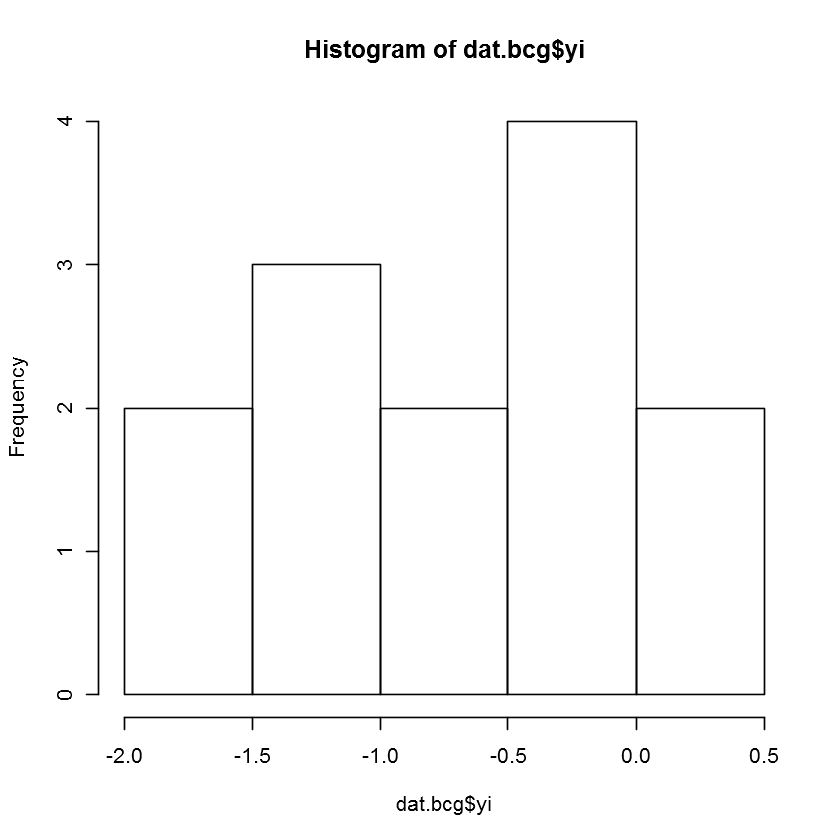

In [60]:
## Solution.
hist(dat.bcg$yi)

### Exercise

The last exercise that is based on the BCG data investigates the association between the effect size `yi` and the moderator variable `ablat` . We can estimate the Pearson product-moment correlation or run a simple linear regression.

To estimate the product-moment correlation, we can use the function `cor(x, y)` or `cor.test(x, y)`.

In [61]:
## Solution.
cor(dat.bcg$yi, dat.bcg$ablat)

[1] -0.549008

To run a linear regression in R, we can use the function `lm(y ~ x, data = ...)` . The tilde (`~`) separates the outcome variable and the predictor variable(s) (more predictor variables can be added using the `+` symbol, e.g `... ~ x1 + x2 + x3, data = ... `). So, in this exercise you want to fit a simple regression model, where yi is the outcome and `ablat` is the predictor variable. 

Tip: Compared to other statistical packages, the output of a lm() call looks rather minimal; no significance stars, no $R^2$ statistic, etc. The `summary()` function provides much more information about the model fit and the regression coefficients. So, your final R call might look like this: `summary(lm(y ~ x, data = ...))`.

In [62]:
## Solution.
summary(lm(yi ~ ablat, data = dat.bcg))


Call:
lm(formula = yi ~ ablat, data = dat.bcg)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26164 -0.27671 -0.00647  0.21297  1.17439 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.14182    0.43853   0.323    0.752  
ablat       -0.02637    0.01211  -2.179    0.052 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6057 on 11 degrees of freedom
Multiple R-squared:  0.3014,	Adjusted R-squared:  0.2379 
F-statistic: 4.746 on 1 and 11 DF,  p-value: 0.052
